Esse notebook foi utilizado como forma de separar o dataset para responder as perguntas de pesquisa:

. Selecionando pessoas com depressão, discartando ansiedade, visto que a pesquisa foca em depressão e que a maioria das pessoas que possuem depressão possui ansiedade

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
df = pd.read_csv("../data/interim/filtered-corr.csv").drop(["Unnamed: 0"], axis =1)

### Verificação de quantidade de pessoas com ansiedade e depressão

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


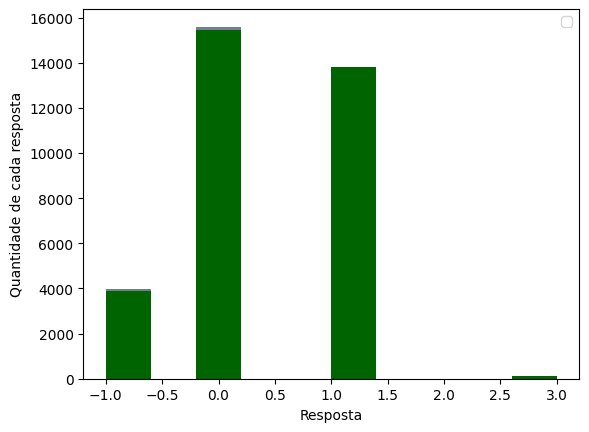

In [4]:
plt.hist(df["AnxietyHx"], color ="#708090")
plt.hist(df["DepressionHx"], color="#006400")
plt.xlabel("Resposta")
plt.ylabel("Quantidade de cada resposta")
plt.legend()
plt.show()

In [5]:
### Estudo focado em depressão e é possível observar que o número de pessoas com ansiedade e depressão são parecidos
### Retirada a coluna Depress -> Muitos dados não respondidos e possui outra coluna que pergunta sobre o estado de depressao com mais respostas
### Depress == DepressionHx


df.drop(['Anxious', 'AnxietyDia','AnxietyHx', 'AnxietyHxTrt', 'AnxietyHxLim','Depress'], axis=1, inplace=True)

In [6]:
df['DepressionHx'].value_counts()

 0.0    15440
 1.0    13832
-1.0     3902
 3.0      111
Name: DepressionHx, dtype: int64

In [7]:
### Retirado dados em que não há resposta sobre o estado de depressão
df = df.query("DepressionHx != -1")

In [8]:
## Retirando colunas de cuidado com a casa visto que não faz parte das perguntas de pesquisa atual
df.drop(['HouseLight', 'HouseHeavy', 'HouseRepair', 'HouseLawn',
       'HouseGarden', 'HouseCare'], axis=1, inplace=True)

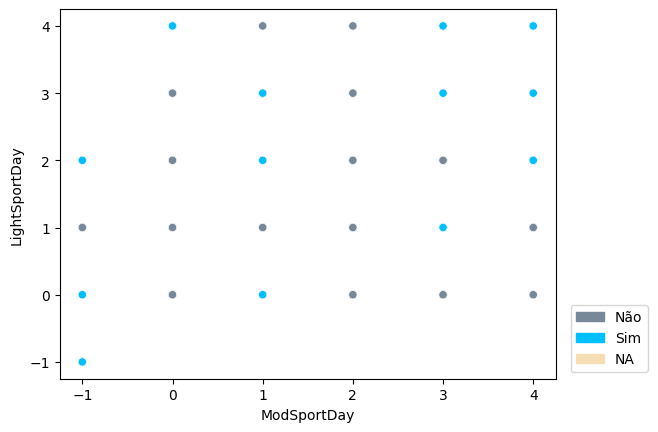

In [9]:
legenda = {
    0 : 'Não',
    1 : 'Sim',
    3 : 'NA'}
sns.scatterplot(data = df, x = 'ModSportDay', y = 'LightSportDay', hue = 'DepressionHx', palette=["#778899", '#00BFFF', '#9370DB'])

patches = [mpatches.Patch(color='#778899', label=legenda[0]),
           mpatches.Patch(color='#00BFFF', label=legenda[1]),
           mpatches.Patch(color='#F5DEB3', label=legenda[3])]

plt.legend(handles=patches, bbox_to_anchor=(1.2,0), loc='lower right')
plt.savefig("../assets/scatte_light+mod_.jpg")
plt.show()

### Separação do dataset para responder as perguntas de pesquisa

In [10]:
df.columns

Index(['age', 'Mobility', 'Care', 'Active', 'Pain', 'CGIPD', 'DepressionHx',
       'DepressionHxTrt', 'DepressionHxLim', 'LeisureHours', 'WalkDay',
       'WalkHours', 'LightSportDay', 'LightSportHours', 'ModSportDay',
       'ModSportHours', 'StrenSportDay', 'StrenSportHours', 'StrengthDay',
       'StrengthHours', 'Work', 'WorkActive', 'MindStress',
       'MindAnxietyPDSympTremor', 'MindAnxietyPDSympSleep',
       'MindAnxietyPDSympOther', 'pa1a', 'pa7a'],
      dtype='object')

In [16]:
## Informações sobre experiência física
dataframe1 = df[['age', 'Mobility', 'Care', 'Active', 'Pain', 'Work', 'WorkActive',
                 'DepressionHx', 'DepressionHxTrt', 'DepressionHxLim']]

## Pergunta 1 -- melhor forma de exercicio fisico - baixa, média ou alta intensidade || Frêquencia
dataframe2 = df[["LightSportDay", "ModSportDay", "StrenSportDay", 'WalkDay',
                "DepressionHx", "DepressionHxTrt", "DepressionHxLim"]]

## Pergunta 2 -- riscos adicionais
dataframe3 = df[['MindStress','MindAnxietyPDSympTremor', 'MindAnxietyPDSympSleep', 'MindAnxietyPDSympOther',
                "DepressionHx", "DepressionHxTrt", "DepressionHxLim"]]

## Pergunta 3 -- duração mínima
dataframe4 = df[["LeisureHours", "WalkHours", 
                 "LightSportHours", "ModSportHours", "StrenSportHours",
                 "pa1a", "pa7a",             
                "DepressionHx", "DepressionHxTrt", "DepressionHxLim"]]


In [17]:
dataframe1.to_csv("../data/processed/exp.csv")
dataframe2.to_csv("../data/processed/intensidade.csv")
dataframe3.to_csv("../data/processed/riscos.csv")
dataframe4.to_csv("../data/processed/duracao.csv")

In [19]:
df.to_csv("../data/processed/all.csv")